In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv(r"C:\Users\rk1066\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")


In [12]:
df1 =  pd.read_csv((r"C:\Users\rk1066\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv"))
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [13]:
df.shape

(1168, 81)

In [14]:
df1.shape

(1168, 81)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory data analysis

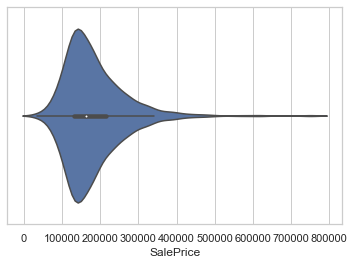

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64

In [21]:
sns.set(style='whitegrid')
sns.violinplot(df['SalePrice'])
plt.show()

df['SalePrice'].value_counts()

Maximum number of SalePrice lies between 140000 and 230000.

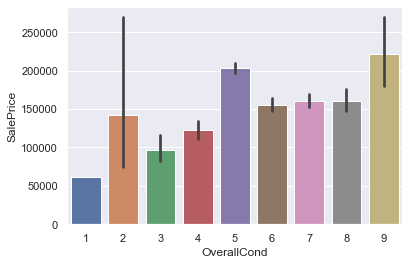

In [22]:
sns.set_theme()
sns.barplot(x='OverallCond',y='SalePrice',data=df)
plt.show()

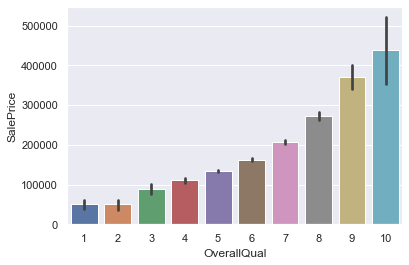

In [23]:
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = df)
plt.show()

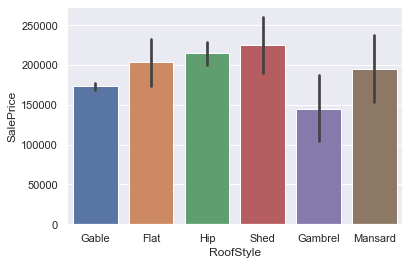

In [24]:
sns.barplot(x = 'RoofStyle', y = 'SalePrice', data = df)
plt.show()


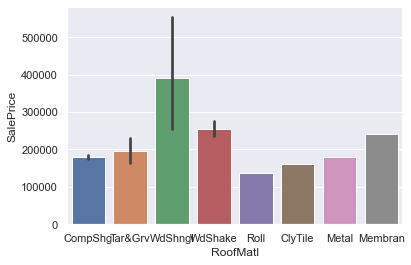

In [25]:
sns.barplot(x = 'RoofMatl', y = 'SalePrice', data = df)
plt.show()


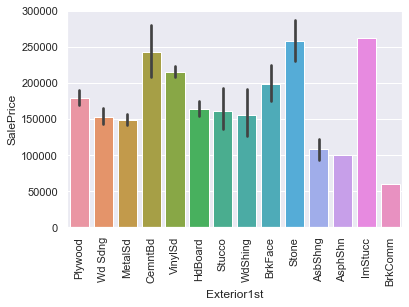

In [26]:
sns.barplot(x = 'Exterior1st', y = 'SalePrice', data = df)
plt.xticks(rotation = 90)
plt.show()

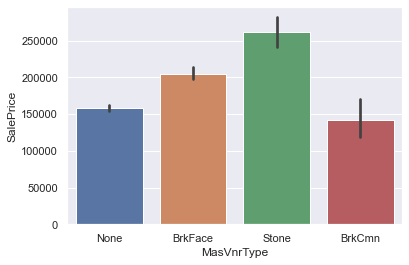

In [27]:
sns.barplot(x = 'MasVnrType', y = 'SalePrice', data = df)
plt.show()

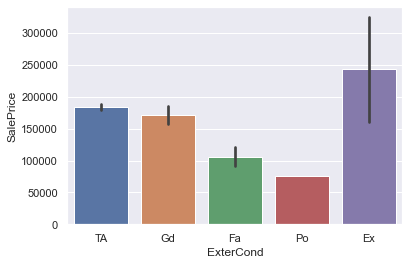

In [28]:
sns.barplot(x = 'ExterCond', y = 'SalePrice', data = df)
plt.show()

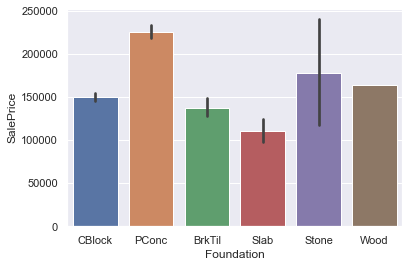

In [29]:
sns.barplot(x = 'Foundation', y = 'SalePrice', data = df)
plt.show()

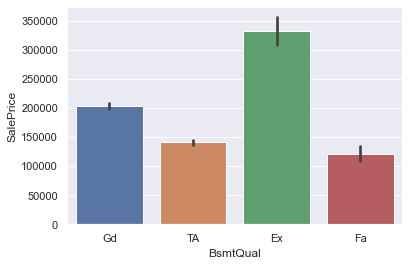

In [30]:
sns.barplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.show()

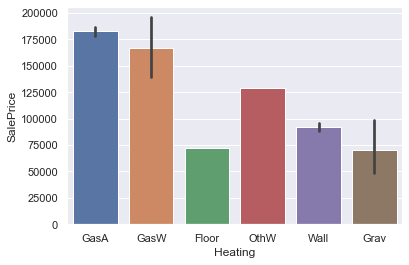

In [31]:
sns.barplot(x = 'Heating', y = 'SalePrice', data = df)
plt.show()


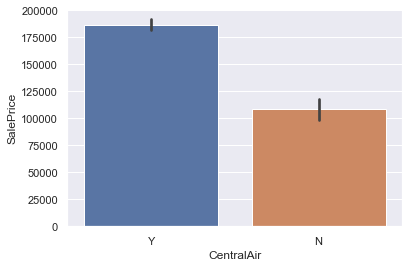

In [32]:
sns.barplot(x = 'CentralAir', y = 'SalePrice', data = df)
plt.show()

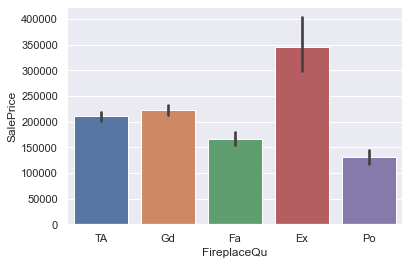

In [33]:
sns.barplot(x = 'FireplaceQu', y = 'SalePrice', data = df)
plt.show()

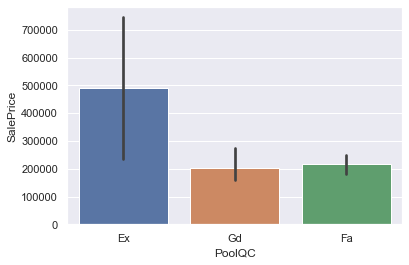

In [34]:
sns.barplot(x = 'PoolQC', y = 'SalePrice', data = df)
plt.show()

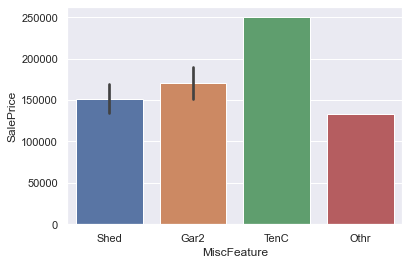

In [35]:
sns.barplot(x = 'MiscFeature', y = 'SalePrice', data = df)
plt.show()

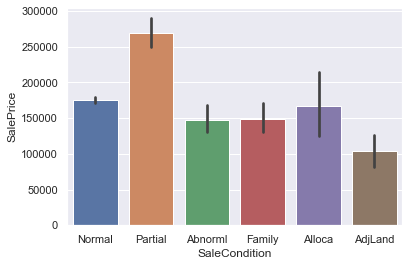

In [36]:
sns.barplot(x = 'SaleCondition', y = 'SalePrice', data = df)
plt.show()

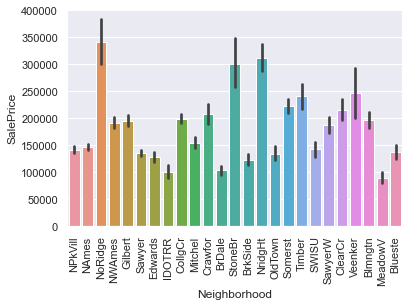

In [37]:
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df)
plt.xticks(rotation = 90)
plt.show()

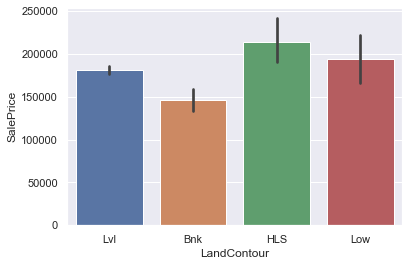

In [38]:
sns.barplot(x = 'LandContour', y = 'SalePrice', data = df)
plt.show()

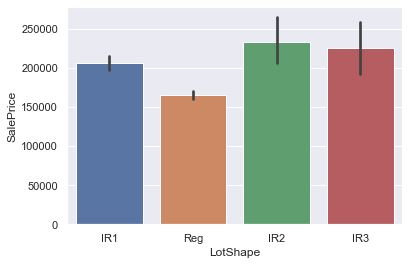

In [39]:
sns.barplot(x = 'LotShape', y = 'SalePrice', data = df)
plt.show()

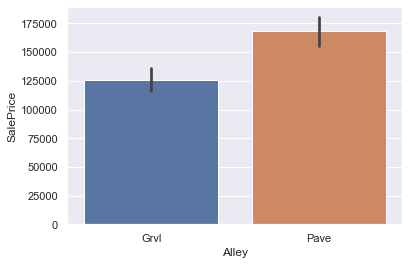

In [40]:
sns.barplot(x = 'Alley', y = 'SalePrice', data = df)
plt.show()

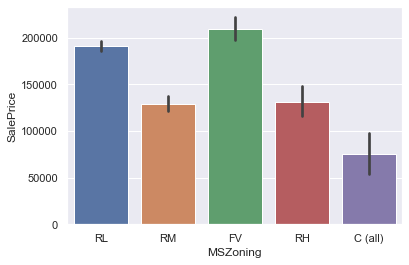

In [41]:
sns.barplot(x = 'MSZoning', y = 'SalePrice', data = df)
plt.show()

In [42]:
# Dropping the columns from train dataset which is having more columns of null and unwanted columns

df = df.drop(columns = ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','Id'], axis = 1)

In [43]:
# Dropping the columns from test dataset which is having more columns of null and unwanted columns

df1 = df1.drop(columns = ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','Id'], axis = 1)

In [44]:
# Splitting the train dataset into numerical and categorical,

trn = df.select_dtypes(exclude = np.object)
trc = df.select_dtypes(include = np.object)

In [45]:
# Splitting the test dataset into numerical and categorical,

ten = df1.select_dtypes(exclude = np.object)
tec = df1.select_dtypes(include = np.object)

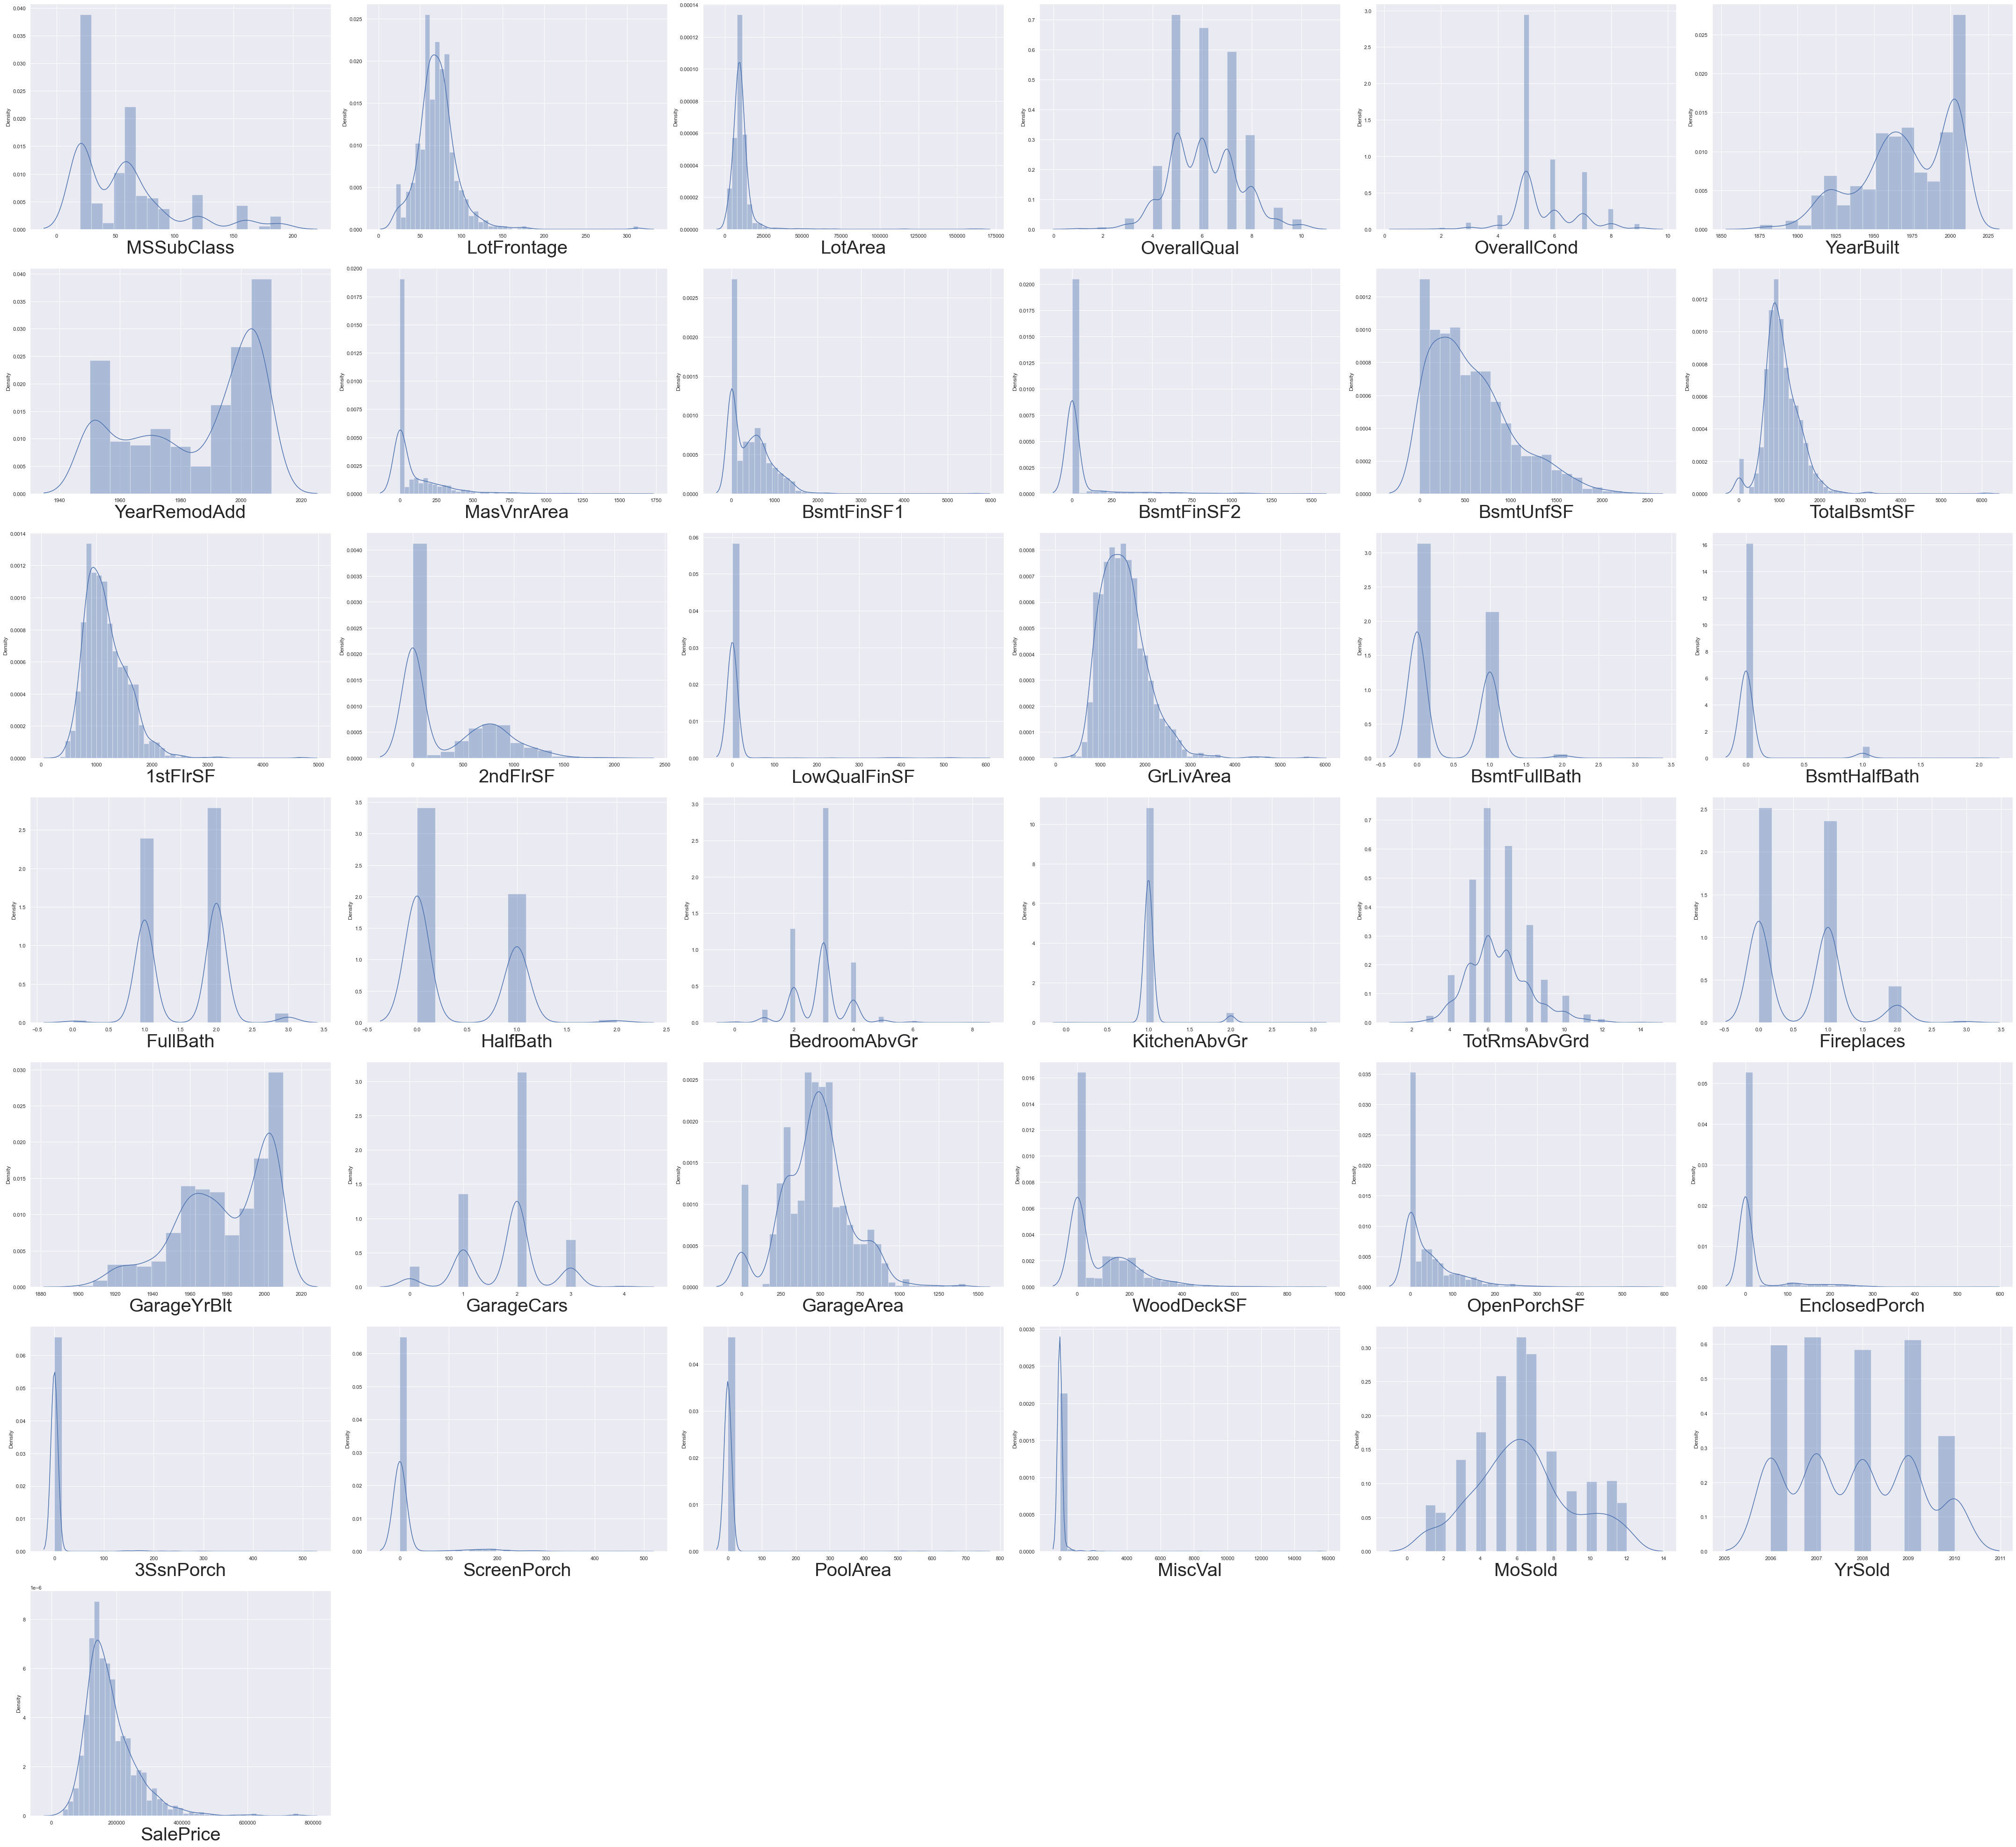

In [46]:
plt.figure(figsize = (60,55))
pltnumber = 1                                 #dist plot for numerical columns

for column in trn:
    if pltnumber<=40:
        ax = plt.subplot(7,6,pltnumber)
        sns.distplot(trn[column])
        plt.xlabel(column,fontsize=40)
        pltnumber+=1
plt.tight_layout()



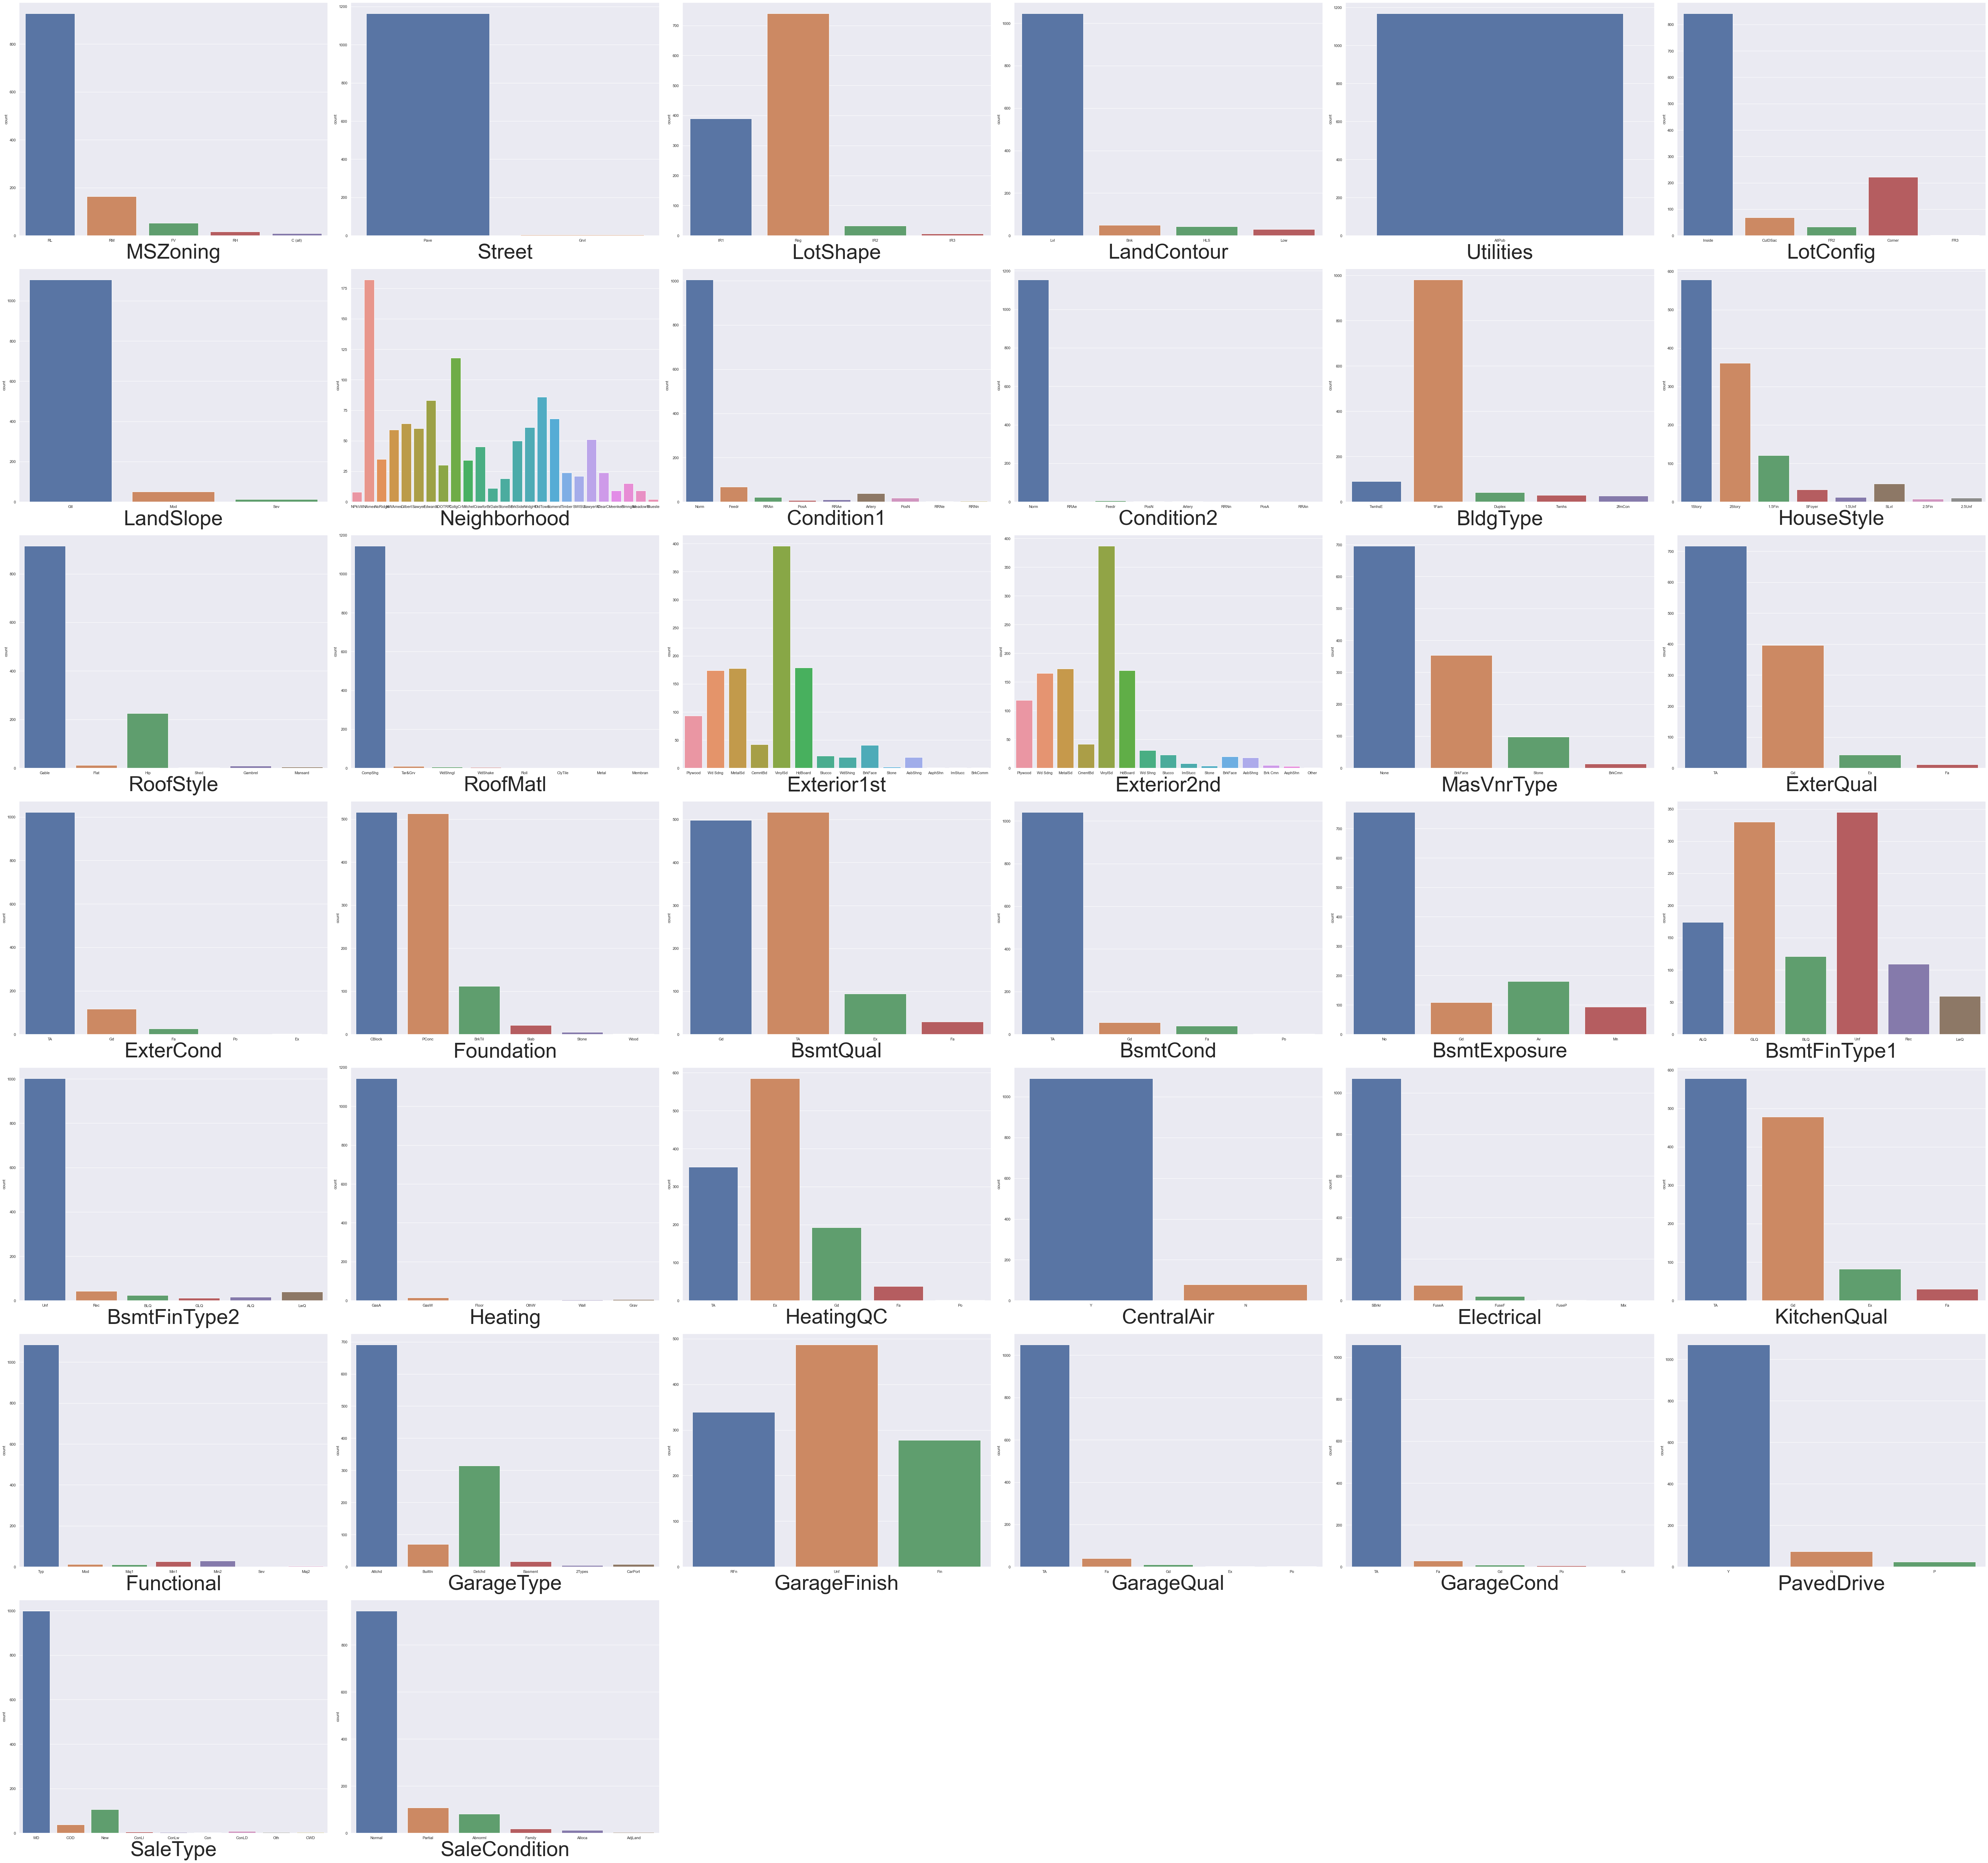

In [47]:
plt.figure(figsize = (80,75))
pltnumber = 1
                                            # Countplot for categorical columns
for column in trc:
    if pltnumber<=40:
        ax = plt.subplot(7,6,pltnumber)
        plt.xlabel(column,fontsize=60)
        sns.countplot(x = trc[column], data = trc)
       
        pltnumber+=1
plt.tight_layout()

In [48]:
trn.isnull().sum()

MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [49]:
trc.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
GarageType       64
GarageFinish     64
GarageQual       64
GarageCond       64
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [50]:
col = ['LotFrontage','MasVnrArea','GarageYrBlt']             # filling NAN values as mean for numerical values
for i in col:
    trn[i] = trn[i].fillna(trn[i].mean())
    ten[i] = ten[i].fillna(ten[i].mean())

In [51]:
cols = ['GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual',
        'MasVnrType']
for j in cols:                                           # filling NAN values as mode for categorical values
    trc[j] = trc[j].fillna(trc[j].mode()[0])
    tec[j] = tec[j].fillna(tec[j].mode()[0])

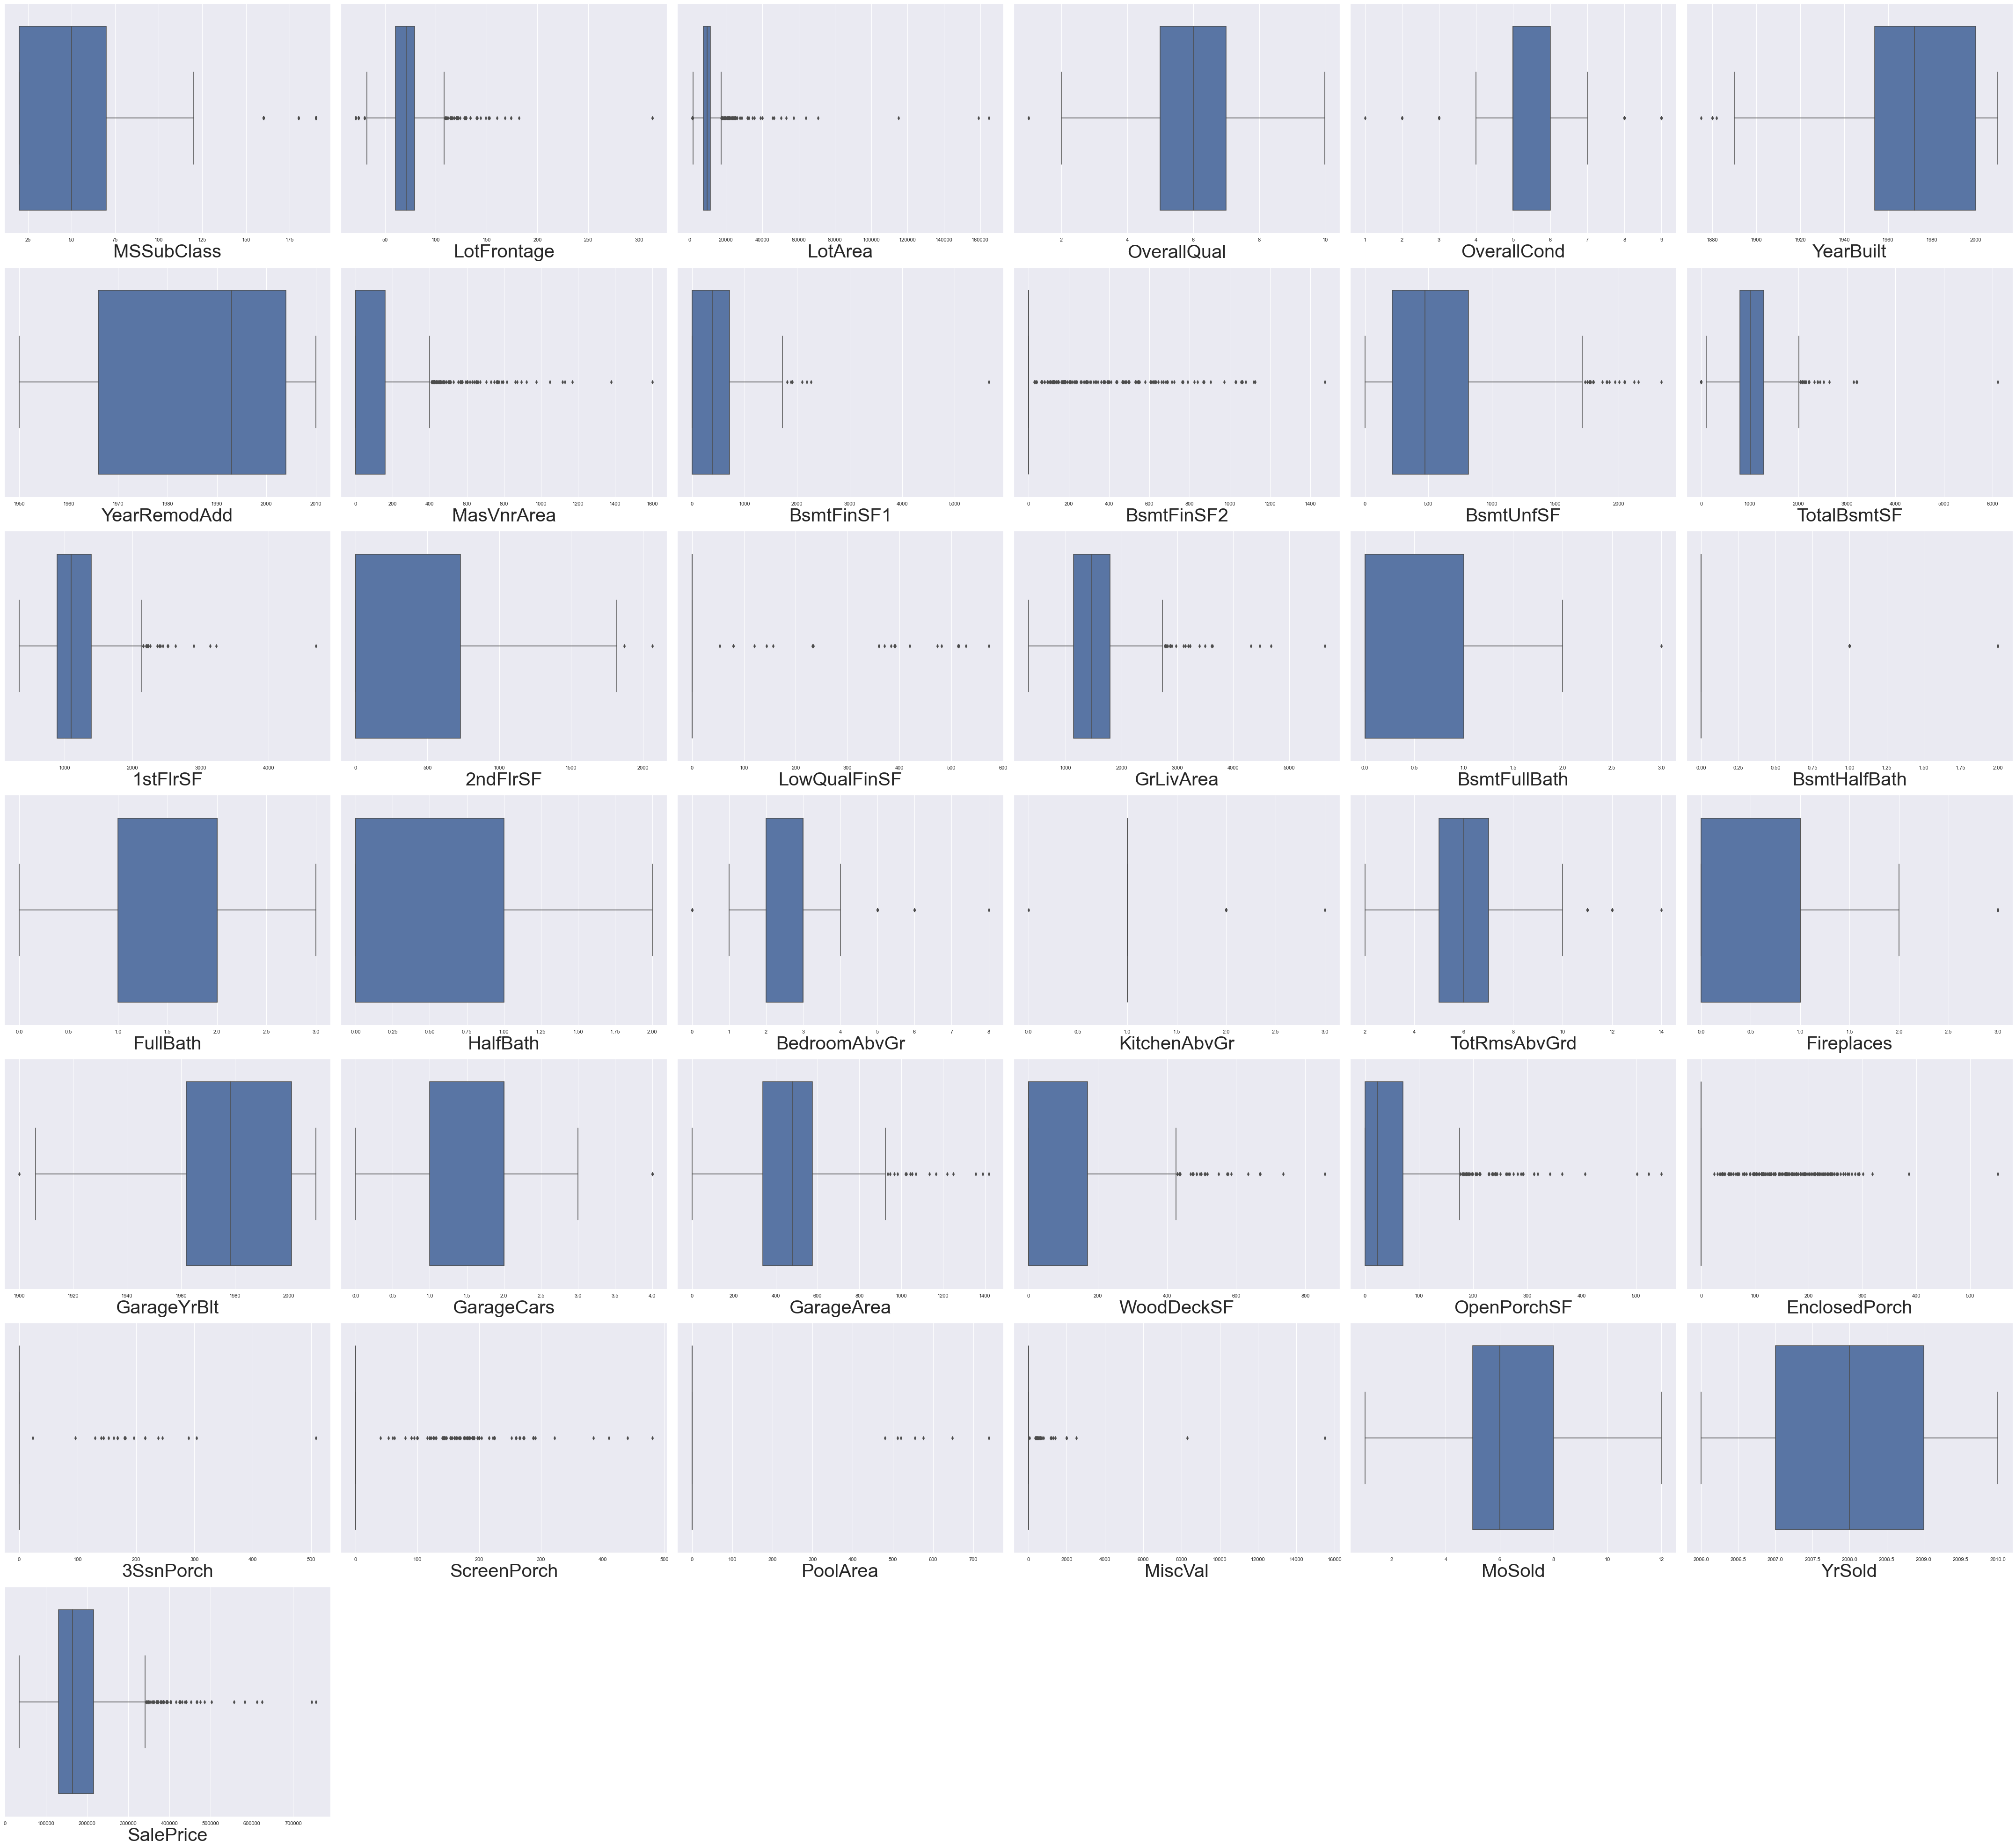

In [52]:
#Checking for outliers
plt.figure(figsize = (60,55))
pltnumber = 1
                                            # boxplot for numerical columns for train dataset
for column in trn:
    if pltnumber<=40:
        ax = plt.subplot(7,6,pltnumber)
        sns.boxplot(trn[column])
        plt.xlabel(column,fontsize=40)
        pltnumber+=1
plt.tight_layout()

In [53]:
for i in trn:
    # Getting 75 and 25 %le
    q75, q25 = np.percentile(trn[i],[75,25])
    
    # calaculating IQR range
    iqr = q75-q25
    
    #calculating Upper and lower
    max = q75 + (iqr*1.5)
    min = q25 - (iqr*1.5)
    
    # replace outliers val to NAN and filling NAN to median,
    
    trn.loc[trn[i]< min,i] = np.nan
    trn.loc[trn[i]> max,i] = np.nan
    
    trn[i].fillna(trn[i].median(),inplace = True)

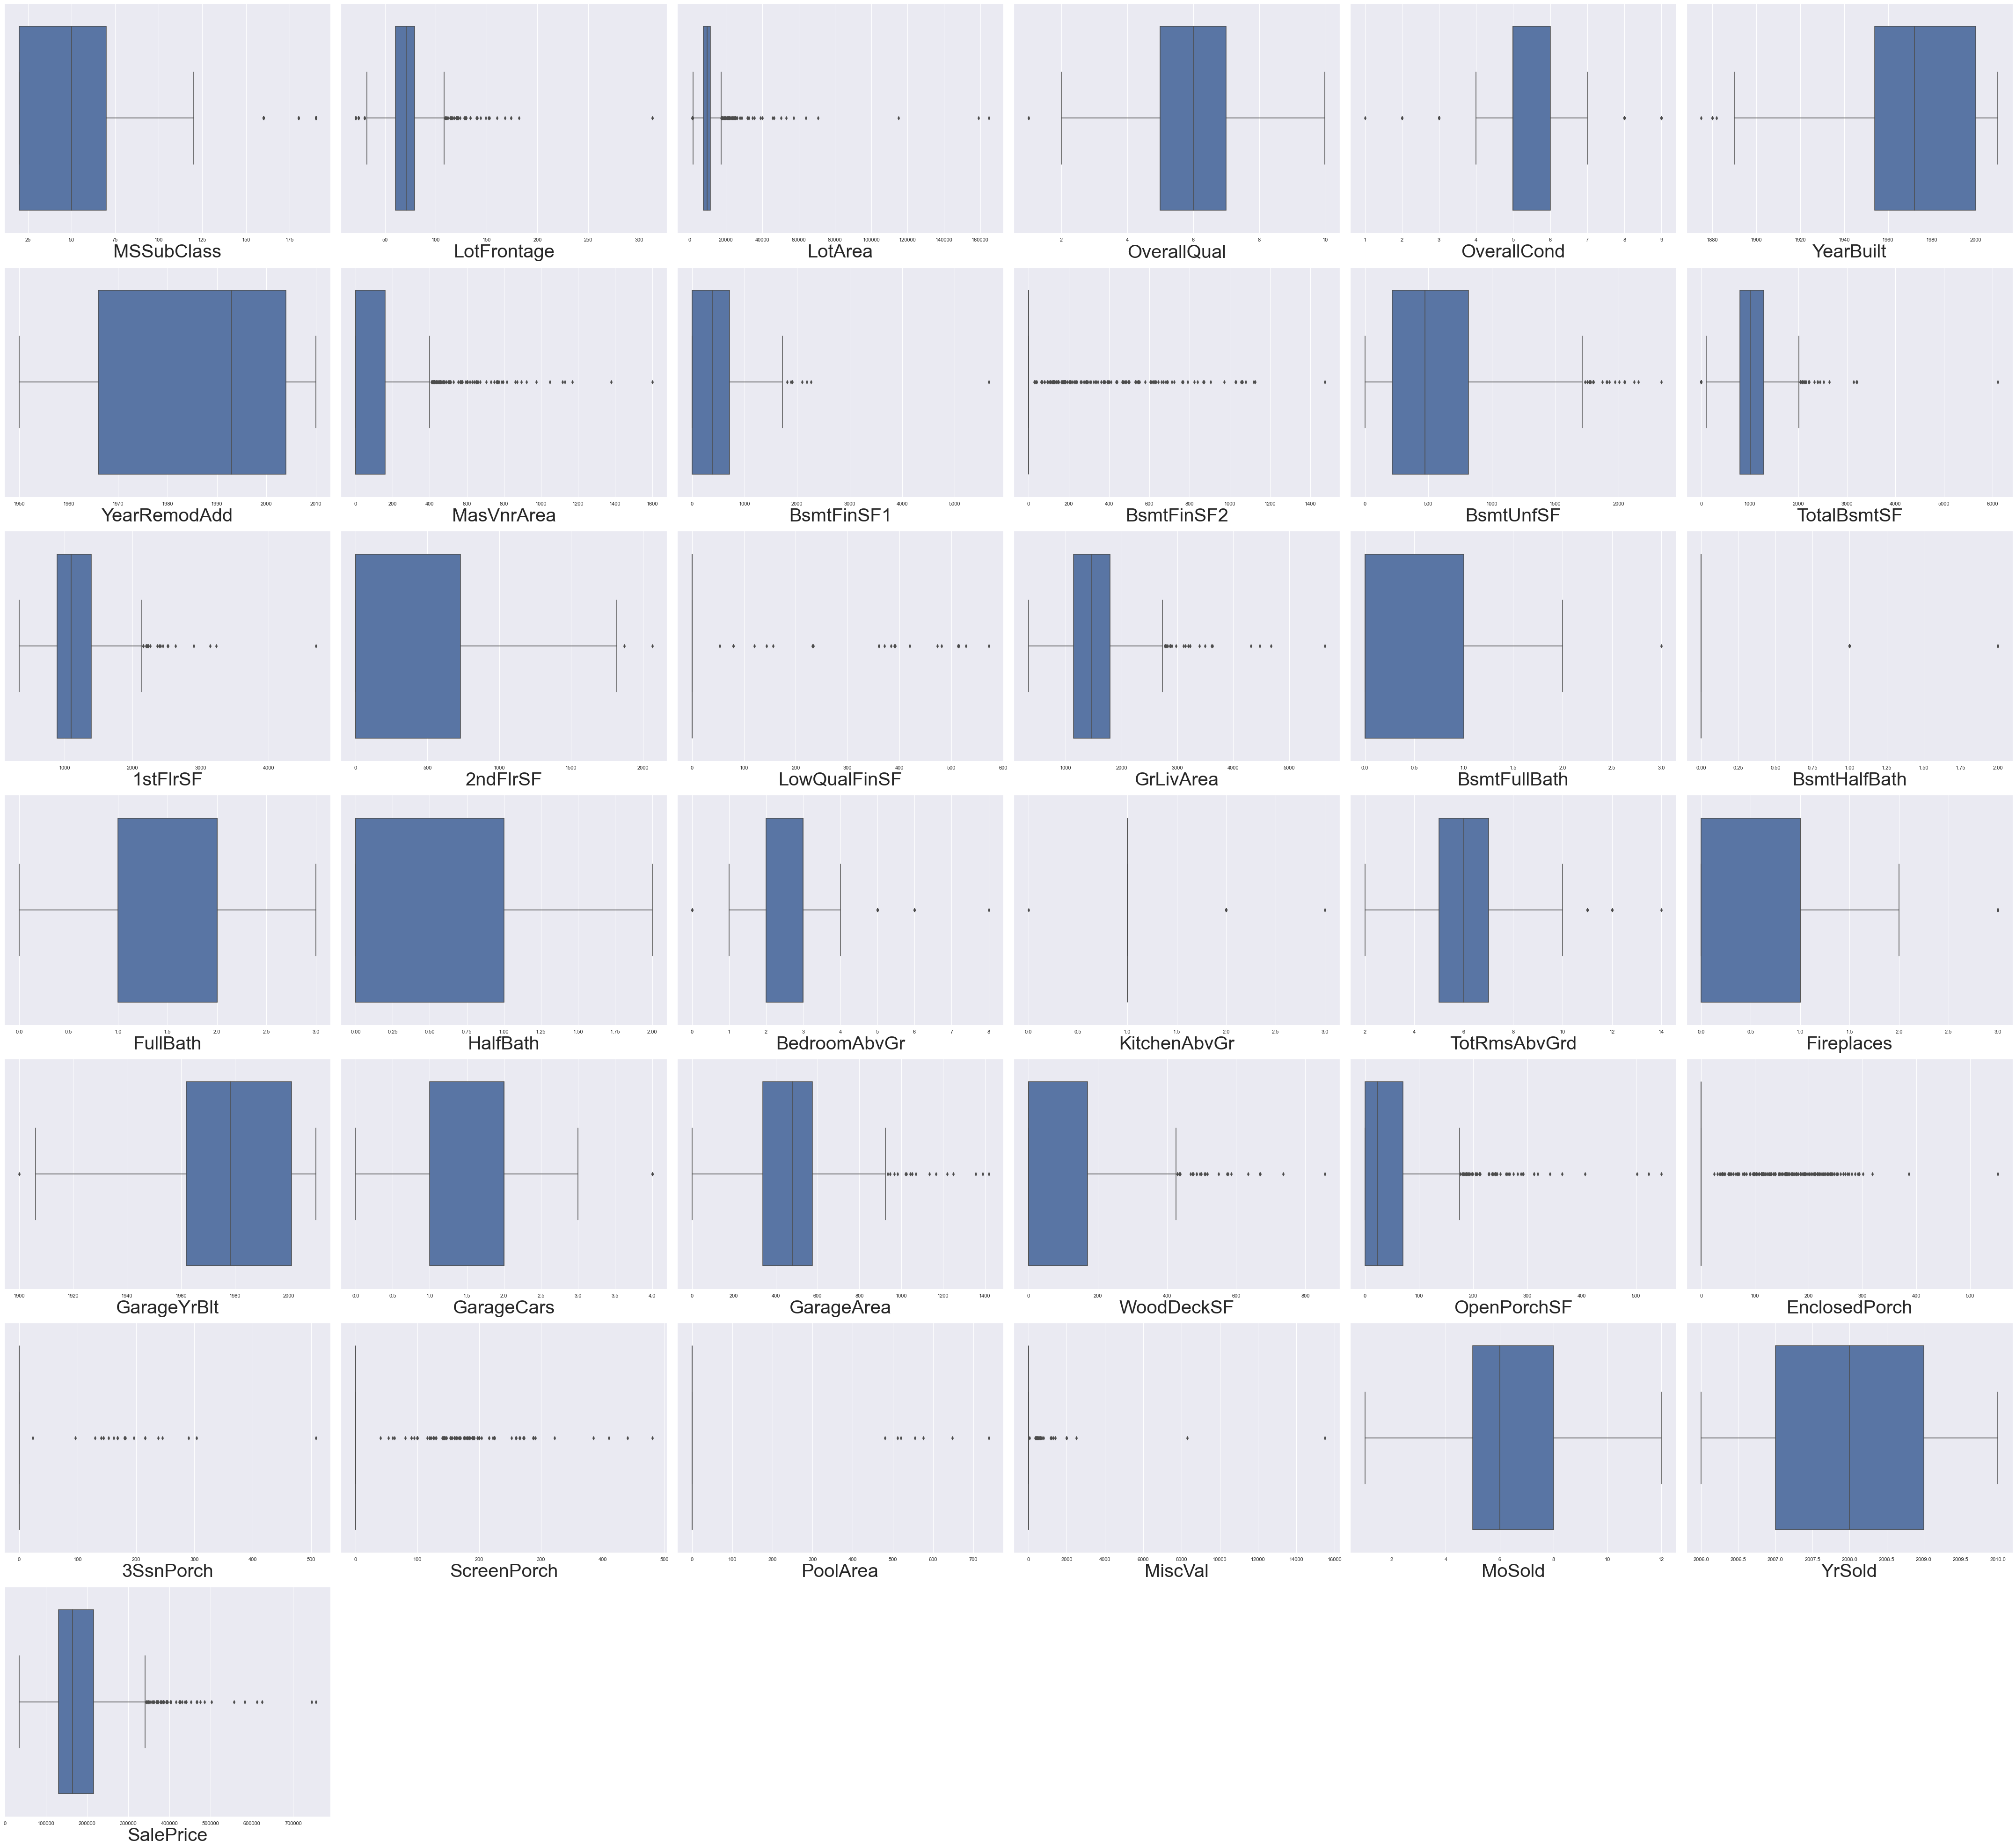

In [54]:
plt.figure(figsize = (60,55))
pltnumber = 1
                                            # boxplot for numerical columns for test dataset
for column in ten:
    if pltnumber<=40:
        ax = plt.subplot(7,6,pltnumber)
        sns.boxplot(ten[column])
        plt.xlabel(column,fontsize=40)
        pltnumber+=1
plt.tight_layout()


In [55]:
for i in ten:
    # Getting 75 and 25 %le
    q75, q25 = np.percentile(ten[i],[75,25])
    
    # calaculating IQR range
    iqr = q75-q25
    
    #calculating Upper and lower
    max = q75 + (iqr*1.5)
    min = q25 - (iqr*1.5)
    
    # replace outliers val to NAN and filling NAN to median,
    
    ten.loc[ten[i]< min,i] = np.nan
    ten.loc[ten[i]> max,i] = np.nan
    
    ten[i].fillna(ten[i].median(), inplace = True)

In [56]:
trc.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [57]:
# applying label encoder to categorical to convert into numerical

le = LabelEncoder()
column = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
for i in column:
    trc[column] = trc[column].apply(le.fit_transform)
    tec[column] = tec[column].apply(le.fit_transform)

# Correlation

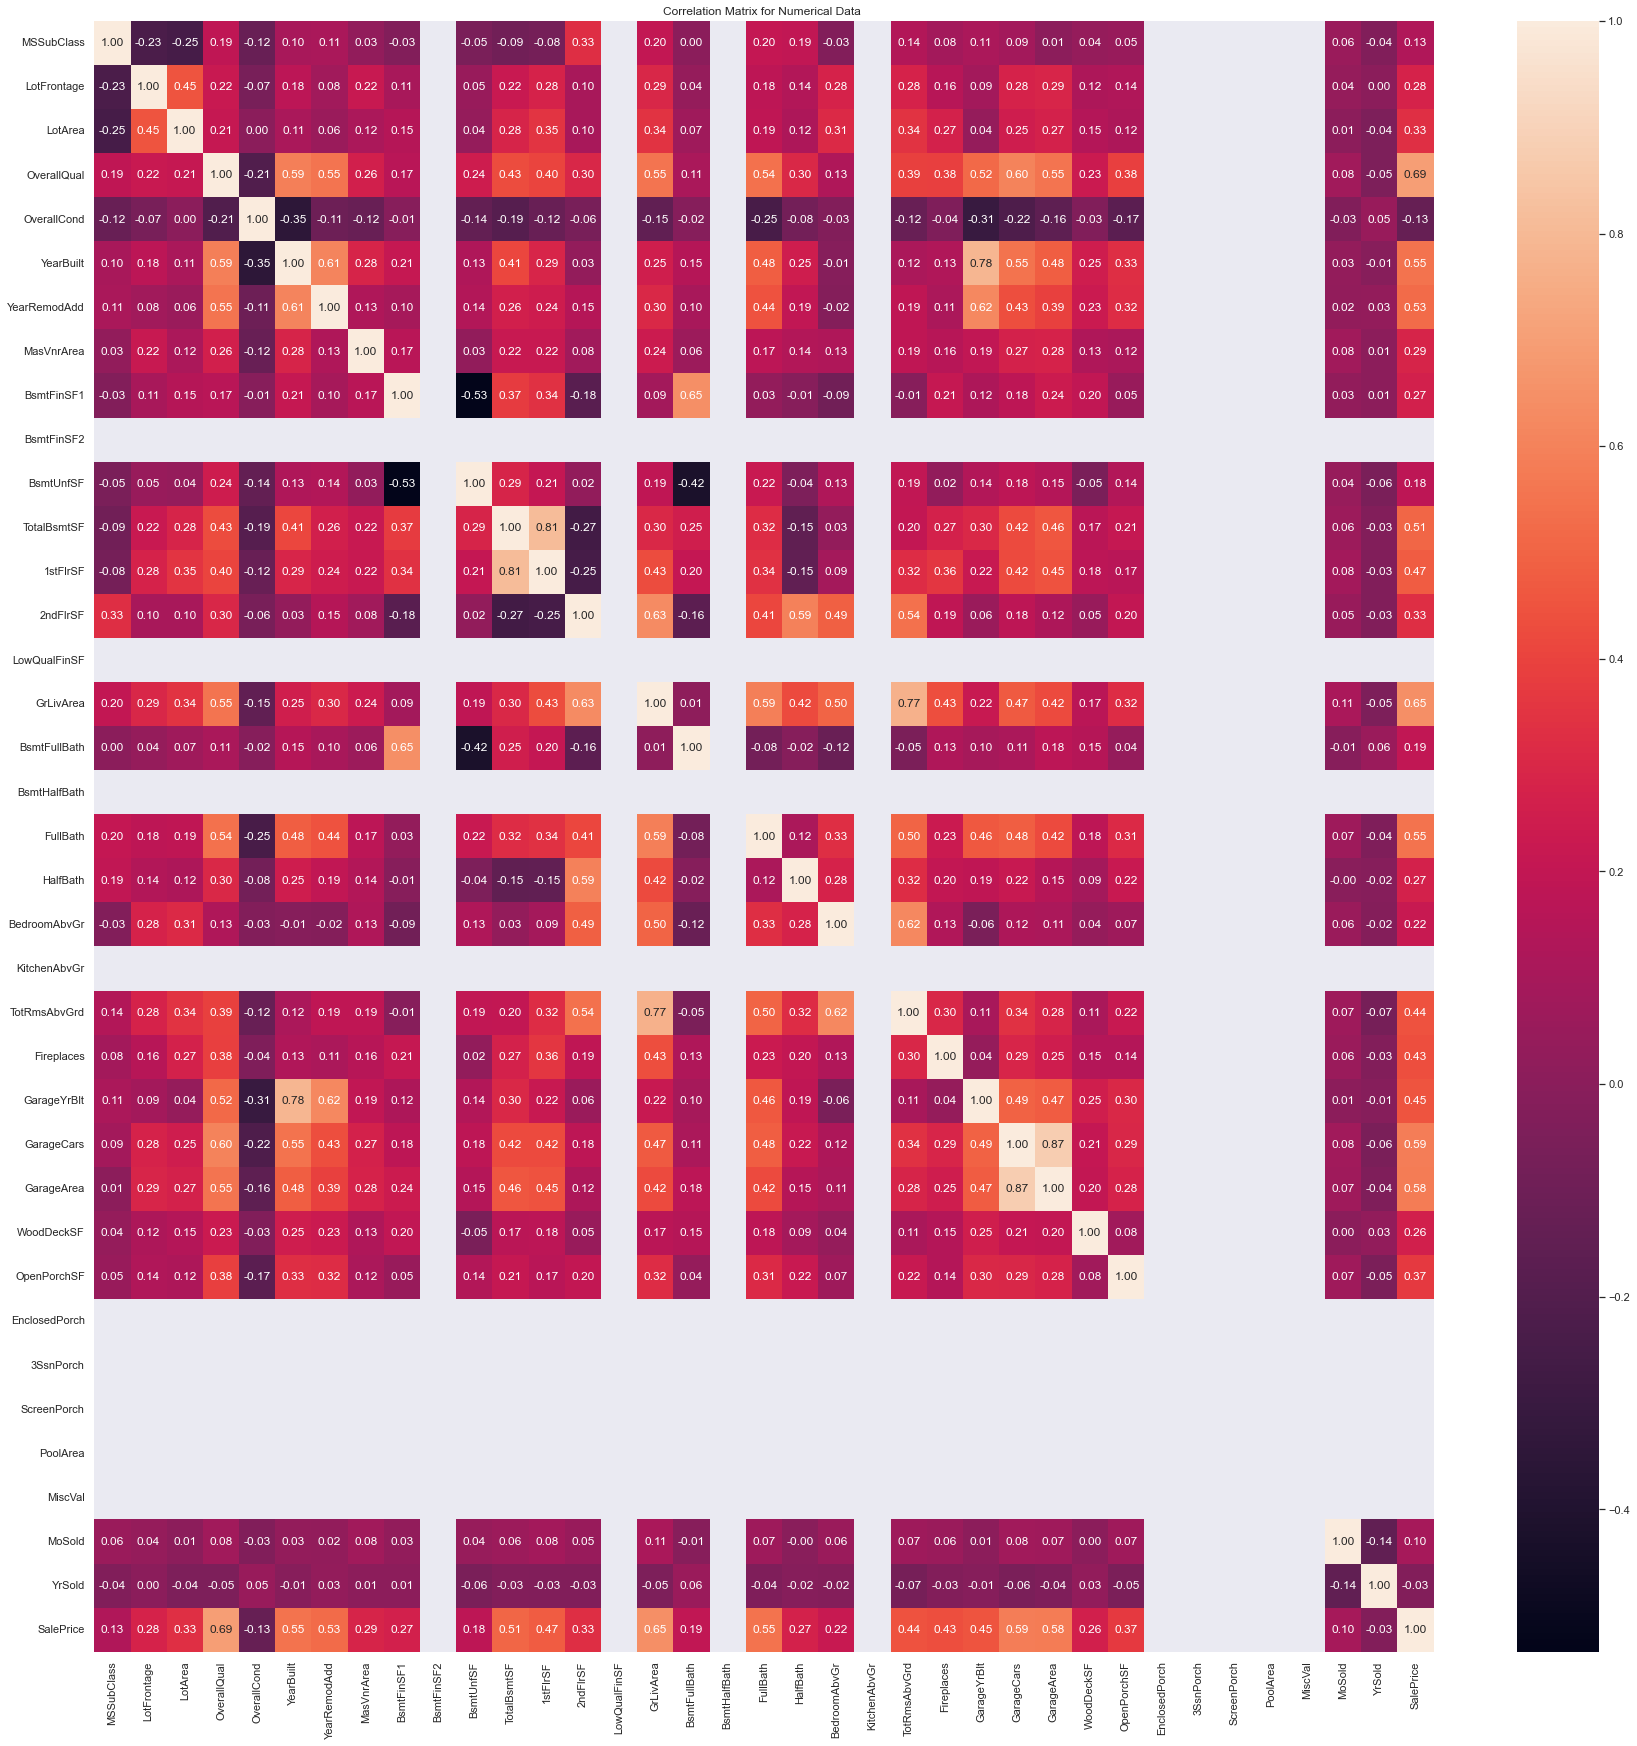

In [58]:
corr = trn.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True,fmt = '.2f')
plt.title("Correlation Matrix for Numerical Data ")
plt.show()

In [59]:
dtr = pd.concat([trn, trc], axis = 1)
dtr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,120.0,70.98847,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,4,3,6,1,1,4,4,2,8,4
1,20.0,95.00000,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,0.0,...,4,2,6,1,2,4,4,2,8,4
2,60.0,92.00000,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,4,3,6,1,2,4,4,2,8,4
3,20.0,105.00000,11751.0,6.0,6.0,1977.0,1977.0,0.0,705.0,0.0,...,4,3,6,1,1,4,4,2,0,4
4,20.0,70.98847,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,...,4,2,6,1,0,4,4,2,8,4


In [60]:
dte = pd.concat([ten, tec], axis = 1)
dte.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,120.0,70.98847,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,4,3,6,1,1,4,4,2,8,4
1,20.0,95.00000,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,0.0,...,4,2,6,1,2,4,4,2,8,4
2,60.0,92.00000,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,4,3,6,1,2,4,4,2,8,4
3,20.0,105.00000,11751.0,6.0,6.0,1977.0,1977.0,0.0,705.0,0.0,...,4,3,6,1,1,4,4,2,0,4
4,20.0,70.98847,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,...,4,2,6,1,0,4,4,2,8,4


# Splitting and Scaling

In [61]:
X = dtr.drop(columns = ['SalePrice'], axis = 1)
y = dtr['SalePrice']

OverallQual     0.459380
GrLivArea       0.127093
TotalBsmtSF     0.072642
2ndFlrSF        0.031652
1stFlrSF        0.027873
                  ...   
ScreenPorch     0.000000
PoolArea        0.000000
MiscVal         0.000000
Utilities       0.000000
KitchenAbvGr    0.000000
Length: 74, dtype: float64


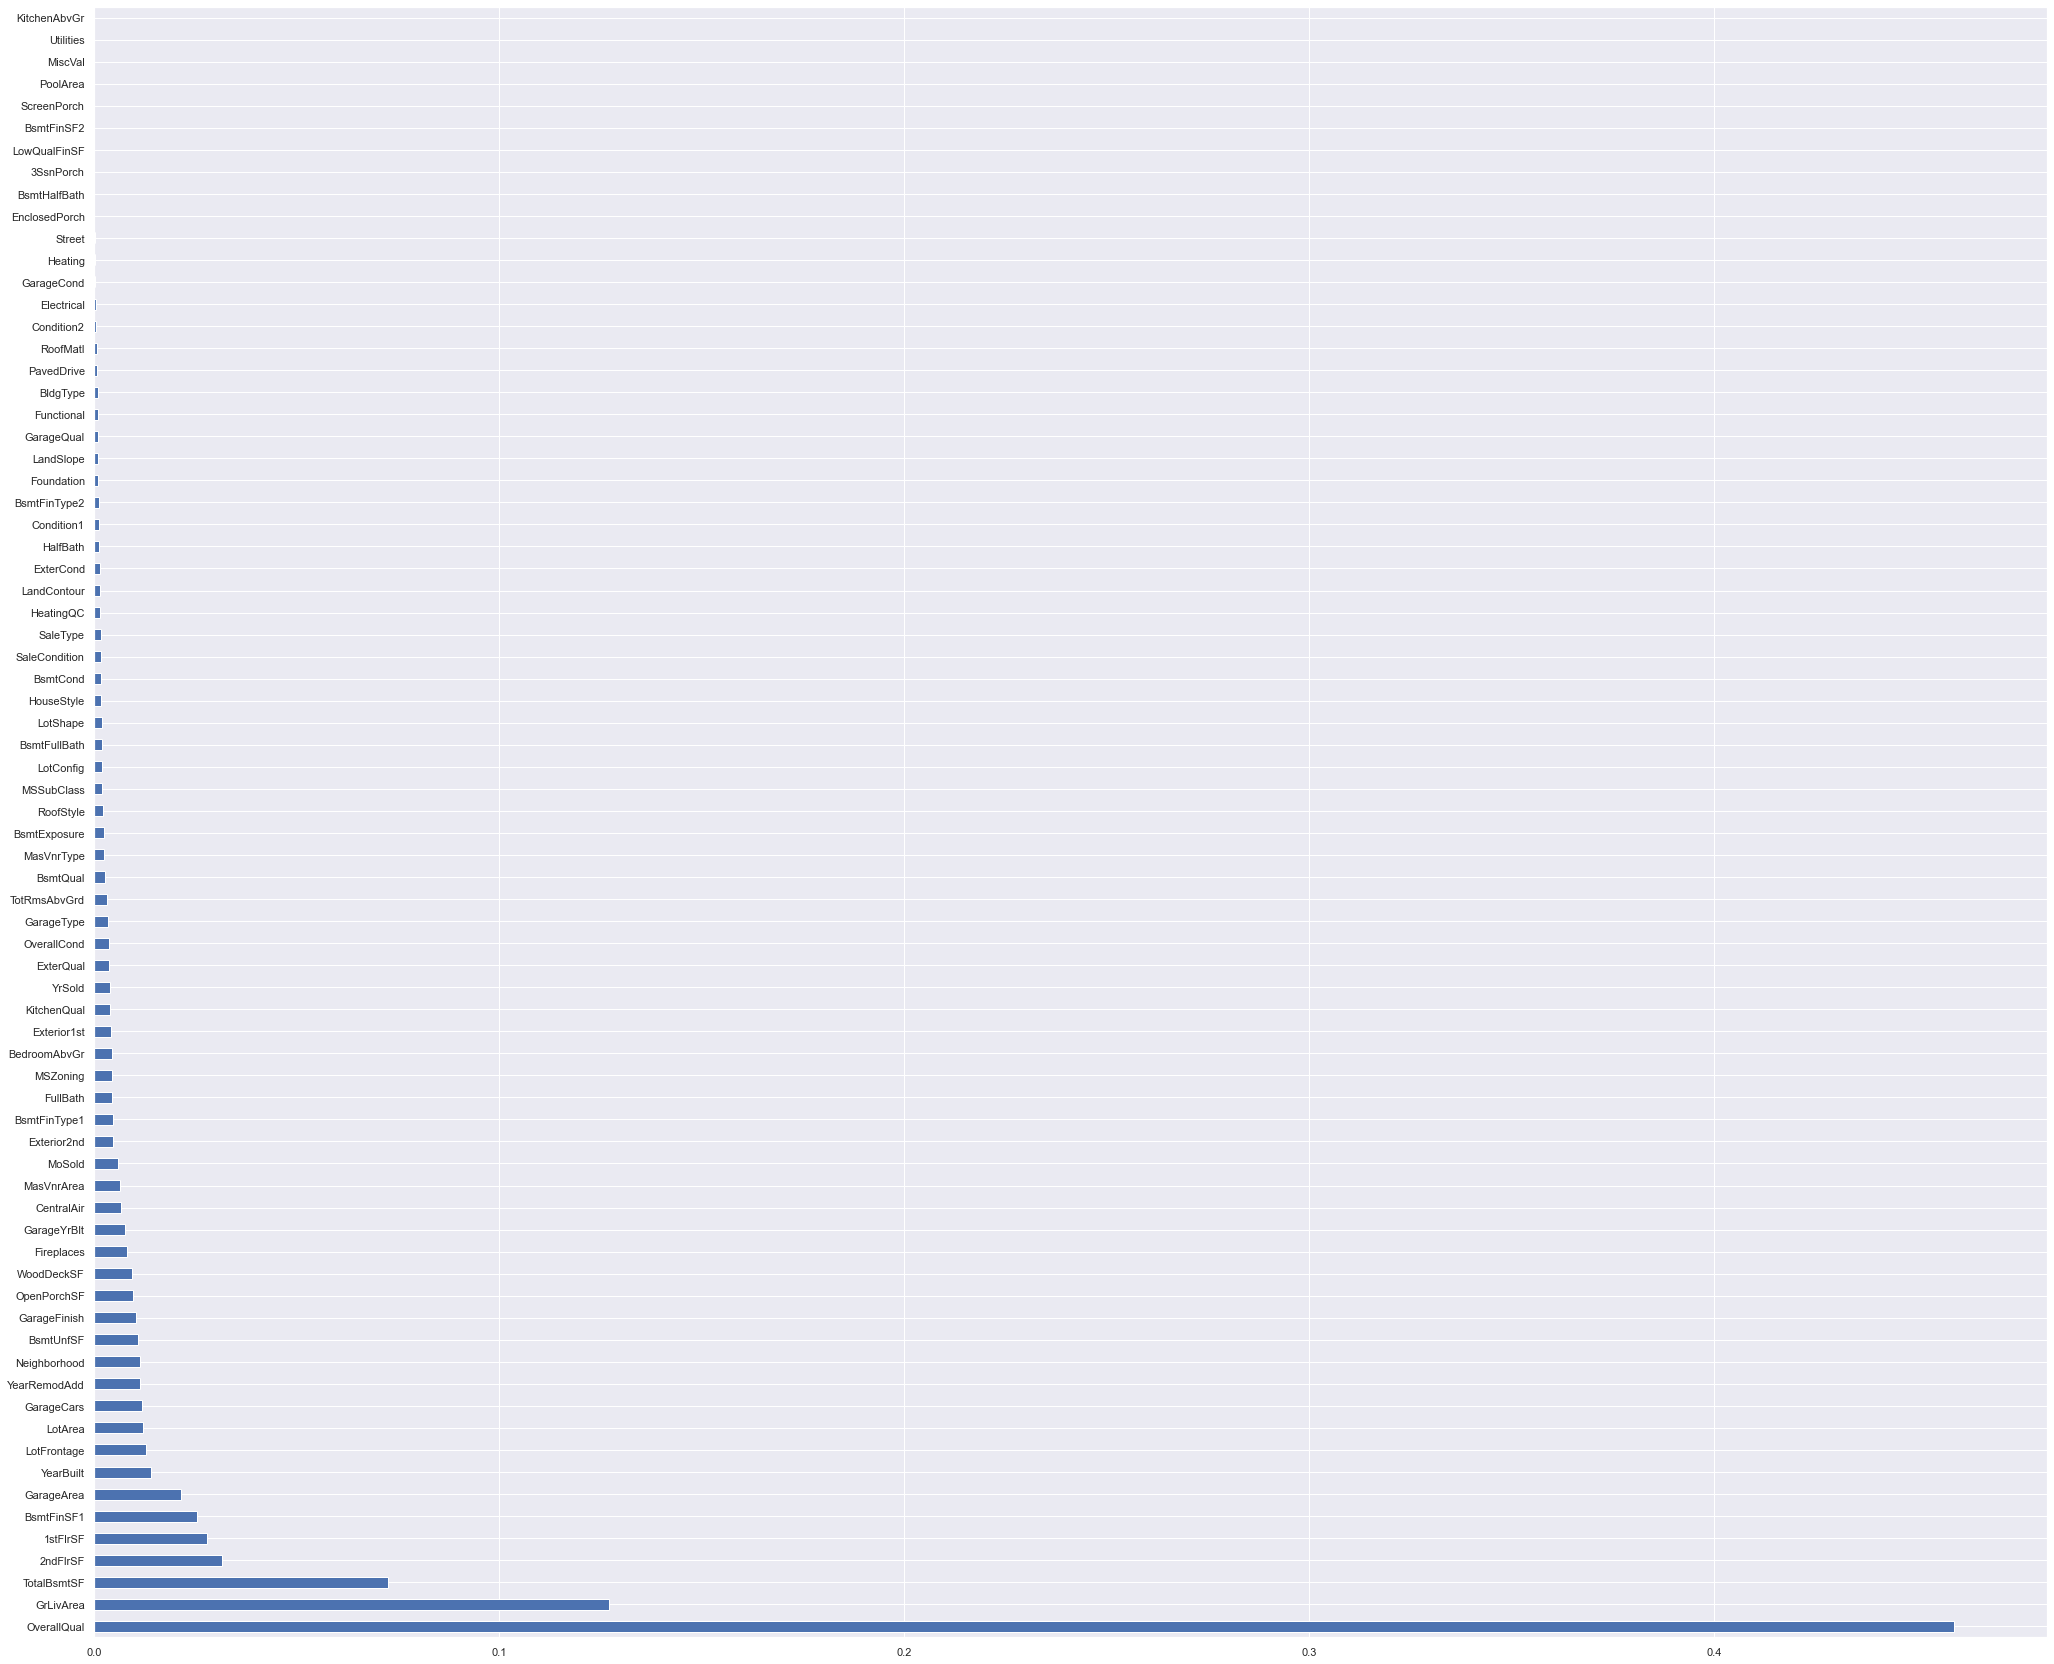

In [62]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(X,y)

fea_imp = pd.Series(rfc.feature_importances_, index = X.columns)
fea_imp.nlargest(75).plot(kind= 'barh', figsize = (35,30))
print(fea_imp.nlargest(75))

In [63]:
dte = dte.drop(columns = ['HalfBath','ExterCond','Condition1','Foundation','BsmtFinType2','BldgType','LandSlope',
                        'GarageQual','Functional','RoofMatl','PavedDrive','Electrical','GarageCond','Condition2',
                        'Heating','Street','BsmtHalfBath','ScreenPorch','3SsnPorch','EnclosedPorch','KitchenAbvGr',
                        'Utilities','PoolArea','LowQualFinSF','MiscVal','BsmtFinSF2'],axis = 1)

In [64]:
x = dtr.drop(columns = ['HalfBath','ExterCond','Condition1','Foundation','BsmtFinType2','BldgType','LandSlope',
                        'GarageQual','Functional','RoofMatl','PavedDrive','Electrical','GarageCond','Condition2',
                        'Heating','Street','BsmtHalfBath','ScreenPorch','3SsnPorch','EnclosedPorch','KitchenAbvGr',
                        'Utilities',
                        'PoolArea','LowQualFinSF','MiscVal','BsmtFinSF2','SalePrice'],axis = 1)
y = dtr['SalePrice']

In [65]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.20, random_state = 555)

In [67]:
# Random forest algorithm 

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 0.7766780045694264
CV Score 0.7414545106378267
MSE 769378292.1113281
RMSE 27737.669190314606
Train Score 0.9636982390876585
Test Score 0.7766780045694264


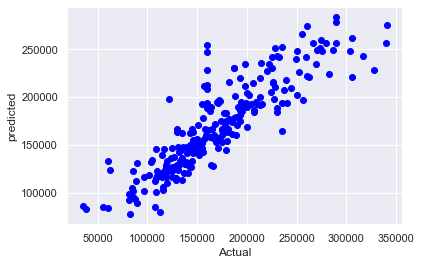

In [68]:
plt.scatter(y_test,y_pred, color = 'blue')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [76]:

#KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
scr_knr = cross_val_score(knr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_knr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 0.7240238145058926
CV Score 0.5519686312843624
MSE 950779997.5075214
RMSE 30834.72064909169
Train Score 0.7720316309484047
Test Score 0.7240238145058926


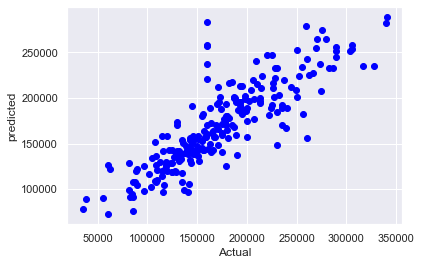

In [77]:
plt.scatter(y_test,y_pred, color = 'blue')         #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [78]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.7933859087151712
CV Score 0.7496166612791587
MSE 711817017.2730454
RMSE 26679.899124116746
Train Score 0.9156286309462046
Test Score 0.7933859087151712


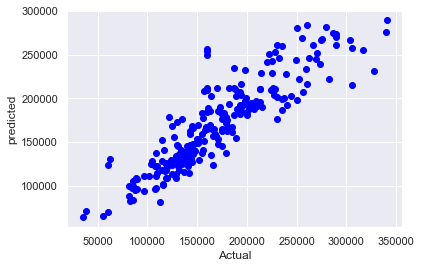

In [79]:
plt.scatter(y_test,y_pred, color = 'blue')    #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [80]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
scr_lr = cross_val_score(lr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_lr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", lr.score(x_train,y_train))
print("Test Score", lr.score(x_test,y_test))

r2_Score 0.7194377394441989
CV Score 0.6952036967821128
MSE 966579724.6757178
RMSE 31089.865304882198
Train Score 0.7244934918276908
Test Score 0.7194377394441989


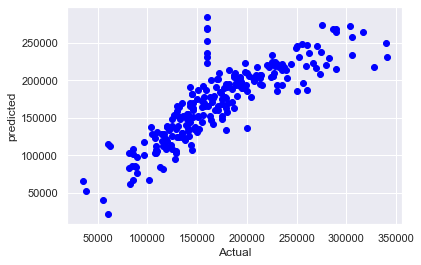

In [81]:
plt.scatter(y_test,y_pred, color = 'blue')     #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [82]:
# Ada boost model

from sklearn.ensemble import AdaBoostRegressor 
abr = AdaBoostRegressor()
abr.fit(x_train, y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.7051550429718937
CV Score 0.6777956149750648
MSE 1015785789.6556575
RMSE 31871.394535784868
Train Score 0.7494846456210538
Test Score 0.7051550429718937


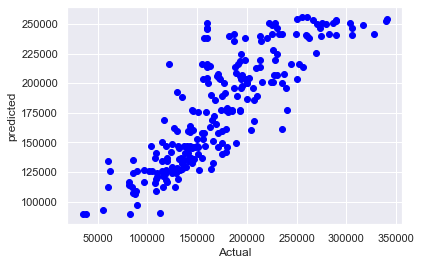

In [83]:
plt.scatter(y_test,y_pred, color = 'blue')    #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [84]:
param = {'loss':['ls','lad','huber','quantile'], 'n_estimators':[100],'criterion':['friedman_mse','mse','mae'],
         'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],'min_samples_leaf':range(0,50,5)    
}

In [86]:
# Applying randomized search CV to increase the accuracy,

rg = RandomizedSearchCV(gbr, param_distributions = param, cv= 5)
rg.fit(x_train,y_train)
rg.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 20,
 'loss': 'ls',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [87]:
# Applying randomized search CV to increase the accuracy,

rg = RandomizedSearchCV(gbr, param_distributions = param, cv= 5)
rg.fit(x_train,y_train)
rg.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 40,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [88]:
final = GradientBoostingRegressor(loss = 'lad',n_estimators= 100,criterion= 'mse', learning_rate = 0.2 , min_samples_leaf = 35 )
final.fit(x_train, y_train)
y_pred = final.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", final.score(x_train,y_train))
print("Test Score", final.score(x_test,y_test))

r2_Score 0.8229648987614702
MSE 609912890.900172
RMSE 24696.414535316093
Train Score 0.8210302373274193
Test Score 0.8229648987614702


Our model has given the accuracy score ie r2 score of 81% which is high than the CV score of model and r2 score of model.

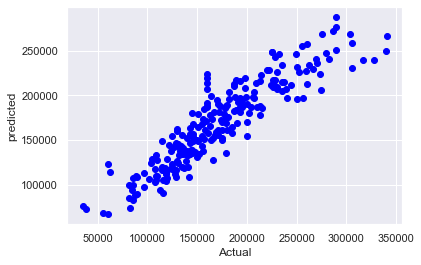

In [89]:
plt.scatter(y_test,y_pred, color = 'blue')   #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [90]:
#Actual vs Predicted values in a dataframe

fin = pd.DataFrame({'Actual':y_test,'Predict': y_pred})
fin

,Actual,Predict
819,143000.0,147177.461937
576,180000.0,189271.102237
1128,138500.0,126915.563193
905,135960.0,141310.128563
1055,146000.0,153665.457411
...,...,...
695,190000.0,169228.727470
1044,250580.0,195935.734532
875,232000.0,246409.719481
814,165000.0,173434.838199


In [94]:
# saving the model

import joblib
joblib.dump(final,"House_price.pkl")

['House_price.pkl']

In [92]:
#Loading the pkl file

model = joblib.load("House_price.pkl")

#loading the test datset
prediction = model.predict(dte)

# converting into dataframe
prediction = pd.DataFrame(prediction)

ValueError: X has 49 features, but DecisionTreeRegressor is expecting 48 features as input.

In [93]:
#saving the prediction
prediction.to_csv('result.csv', index = True)

NameError: name 'prediction' is not defined